In [2]:
!pip install numpy scipy matplotlib pandas

=== OPTIMIZATION EXAMPLE ===
Minimum found at x = -1.3064
Minimum value = -7.9458


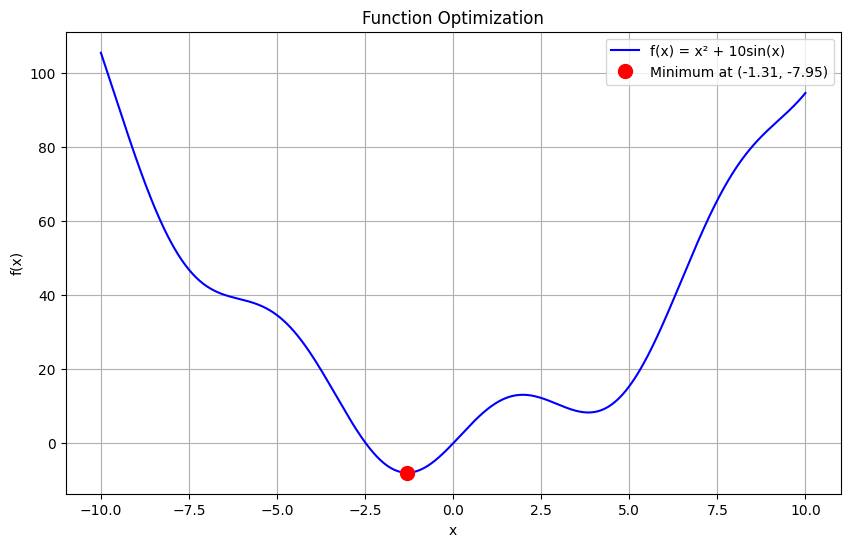



=== STATISTICS EXAMPLE ===
Group 1 mean: 3.20
Group 2 mean: 6.50
T-statistic: -3.7937
P-value: 0.0013
Groups are significantly different (p < 0.05)


=== SIGNAL PROCESSING EXAMPLE ===


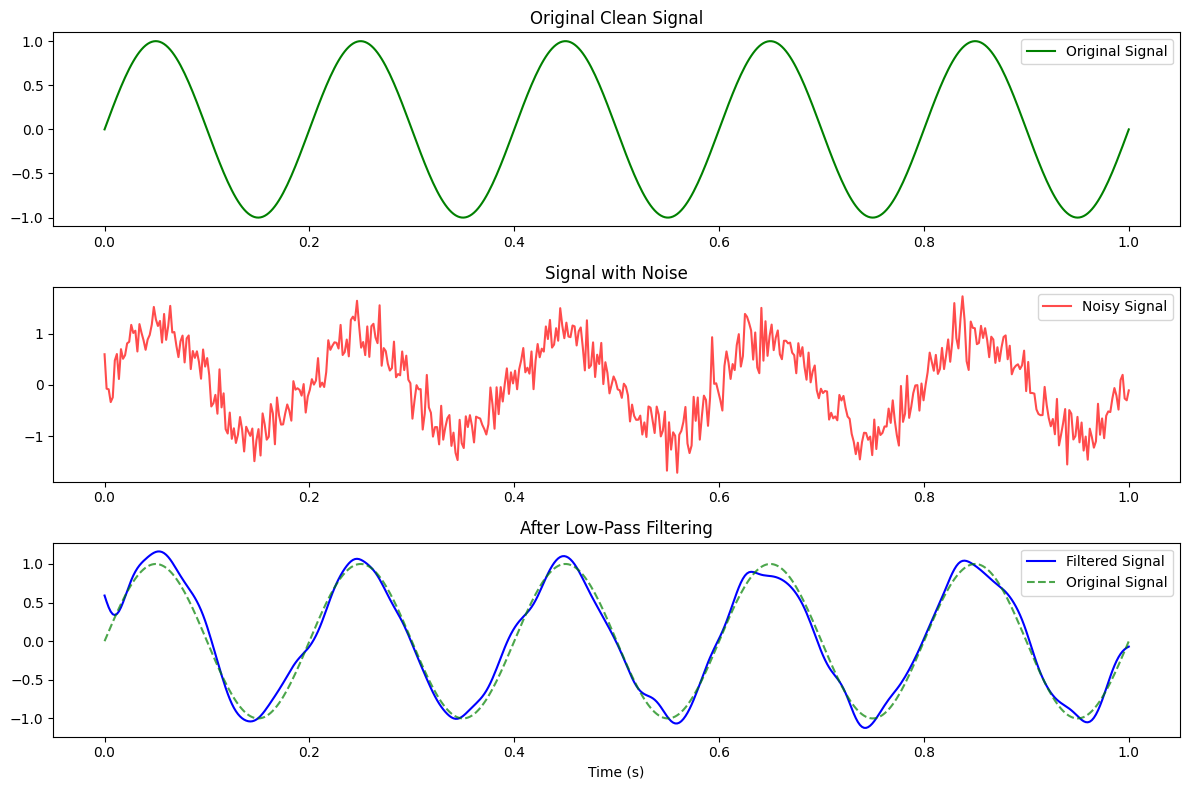

Noise reduction achieved: 0.2944 -> 0.1004


=== LINEAR ALGEBRA EXAMPLE ===
Solving system of equations:
3x + 2y = 7
1x + 4y = 5
Solution: x = 1.80, y = 0.80
Verification: A @ x = [7. 5.]
Should equal b = [7 5]


=== INTERPOLATION EXAMPLE ===


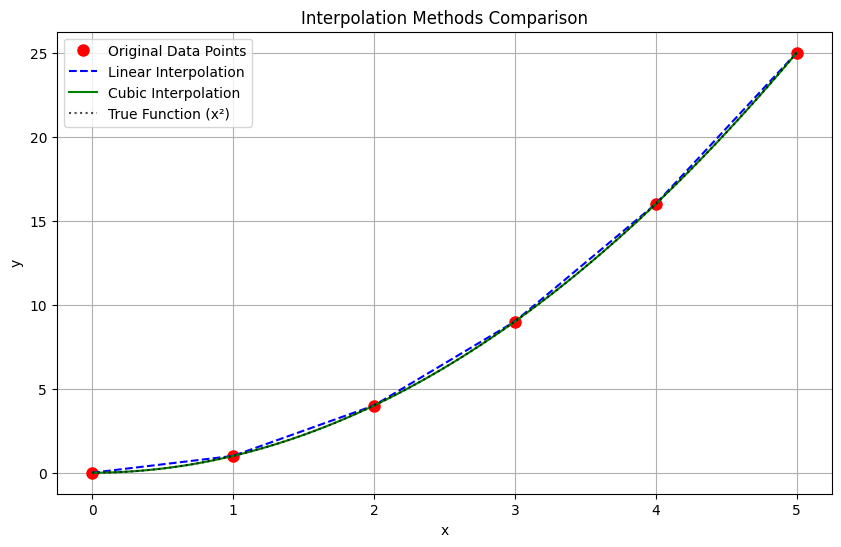

Interpolation completed - cubic interpolation closely matches the true quadratic function!


All SciPy examples completed successfully!


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import ttest_ind
from scipy.signal import butter, filtfilt
from scipy.linalg import solve
from scipy.interpolate import interp1d

# 1. OPTIMIZATION - Find minimum of a function
print("=== OPTIMIZATION EXAMPLE ===")
def objective_function(x):
    return x**2 + 10*np.sin(x)

result = minimize(objective_function, x0=0)
print(f"Minimum found at x = {result.x[0]:.4f}")
print(f"Minimum value = {result.fun:.4f}")

# Plot the function and minimum
x_plot = np.linspace(-10, 10, 1000)
y_plot = objective_function(x_plot)
plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, 'b-', label='f(x) = x² + 10sin(x)')
plt.plot(result.x, result.fun, 'ro', markersize=10, label=f'Minimum at ({result.x[0]:.2f}, {result.fun:.2f})')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Function Optimization')
plt.legend()
plt.grid(True)
plt.show()

print("\n" + "="*50 + "\n")

# 2. STATISTICS - T-test between two groups
print("=== STATISTICS EXAMPLE ===")
group1 = np.array([1, 2, 3, 4, 5, 3, 2, 4, 5, 3])
group2 = np.array([2, 4, 6, 8, 10, 7, 5, 9, 8, 6])

statistic, p_value = ttest_ind(group1, group2)
print(f"Group 1 mean: {np.mean(group1):.2f}")
print(f"Group 2 mean: {np.mean(group2):.2f}")
print(f"T-statistic: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Groups are significantly different (p < 0.05)")
else:
    print("No significant difference between groups (p >= 0.05)")

print("\n" + "="*50 + "\n")

# 3. SIGNAL PROCESSING - Filter noise
print("=== SIGNAL PROCESSING EXAMPLE ===")
# Create a noisy signal
t = np.linspace(0, 1, 500)
clean_signal = np.sin(2 * np.pi * 5 * t)  # 5 Hz sine wave
noise = 0.3 * np.random.randn(len(t))
noisy_signal = clean_signal + noise

# Apply low-pass filter
b, a = butter(3, 0.1)  # 3rd order, cutoff at 0.1 (normalized frequency)
filtered_data = filtfilt(b, a, noisy_signal)

plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(t, clean_signal, 'g-', label='Original Signal')
plt.title('Original Clean Signal')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, noisy_signal, 'r-', alpha=0.7, label='Noisy Signal')
plt.title('Signal with Noise')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, filtered_data, 'b-', label='Filtered Signal')
plt.plot(t, clean_signal, 'g--', alpha=0.7, label='Original Signal')
plt.title('After Low-Pass Filtering')
plt.xlabel('Time (s)')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Noise reduction achieved: {np.std(noisy_signal - clean_signal):.4f} -> {np.std(filtered_data - clean_signal):.4f}")

print("\n" + "="*50 + "\n")

# 4. LINEAR ALGEBRA - Solve system of equations
print("=== LINEAR ALGEBRA EXAMPLE ===")
# Solve: 3x + 2y = 7
#        1x + 4y = 5
A = np.array([[3, 2],
              [1, 4]])
b = np.array([7, 5])

x = solve(A, b)
print("Solving system of equations:")
print("3x + 2y = 7")
print("1x + 4y = 5")
print(f"Solution: x = {x[0]:.2f}, y = {x[1]:.2f}")

# Verify the solution
verification = A @ x
print(f"Verification: A @ x = {verification}")
print(f"Should equal b = {b}")

print("\n" + "="*50 + "\n")

# 5. INTERPOLATION - Fill gaps in data
print("=== INTERPOLATION EXAMPLE ===")
# Create sparse data points
x_known = np.array([0, 1, 2, 3, 4, 5])
y_known = np.array([0, 1, 4, 9, 16, 25])  # y = x²

# Create interpolation function
f_linear = interp1d(x_known, y_known, kind='linear')
f_cubic = interp1d(x_known, y_known, kind='cubic')

# Generate new x points for smooth curve
x_new = np.linspace(0, 5, 100)
y_linear = f_linear(x_new)
y_cubic = f_cubic(x_new)

plt.figure(figsize=(10, 6))
plt.plot(x_known, y_known, 'ro', markersize=8, label='Original Data Points')
plt.plot(x_new, y_linear, 'b--', label='Linear Interpolation')
plt.plot(x_new, y_cubic, 'g-', label='Cubic Interpolation')
plt.plot(x_new, x_new**2, 'k:', alpha=0.7, label='True Function (x²)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolation Methods Comparison')
plt.legend()
plt.grid(True)
plt.show()

print("Interpolation completed - cubic interpolation closely matches the true quadratic function!")

print("\n" + "="*50 + "\n")
print("All SciPy examples completed successfully!")